In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [2]:
COLORS = {
    'green': '#009e73',
    'blue': '#0072b2',
    'yellow': '#f1e443',
    'orange': '#e69f03',
    'red': '#d55f00',
    'purple': '#cc79a7'
}

In [45]:
# Epsilon - Data
# n=1024, d=7, s=7

epsilon_groups = {
    "Honest Comm Phase (s)": [0.006, 0.0058, 0.006],
    "Dishonest Comm Phase (s)": [39.58, 39.3, 38.76],
    "Rand Gen Phase (s)": [0.005, 0.338, 33.93],
    "Query Phase (s)": [0.000307, 0.000299, 0.000298],
}
epsilon_categories = ['ε = ' + str(c) for c in [10, 1, 0.1]]

# DB Size - Data
# d=7, e=1, s=7

db_size_groups = {
    "Honest Comm Phase (s)": [0.006, 0.006, 0.006, 0.006, 0.006],
    "Dishonest Comm Phase (s)": [38.63, 77.80, 155.18, 309.08, 619.76],
    "Rand Gen Phase (s)": [0.321, 0.397, 0.479, 0.578, 0.676],
    "Query Phase (s)": [0.000277, 0.000282, 0.000289, 0.000338, 0.000307],
}
db_size_categories = [str(c) for c in [1024, 2048, 4096, 8192, 16384]]

# DB Dimension - Data
# n=1024, e=1, s=7

db_dim_groups = {
    "Honest Comm Phase (s)": [0.006, 0.049, 0.190, 0.752],
    "Dishonest Comm Phase (s)": [38.57, 312.77, 1311.12, 5616.63],
    "Rand Gen Phase (s)": [0.326, 0.328, 0.354, 0.332],
    "Query Phase (s)": [0.000281, 0.000361, 0.000524, 0.000499],
}
db_dim_categories = [str(c) for c in [7, 10, 12, 14]]

# DB Sparsity - Data
# n=1024, d=7, e=1
sparsity_x = [*range(1, 2**7)]
sparsity_homomorphic_s = [
3.44E-05,
6.42E-05,
8.78E-05,
0.00011204,
0.000134385,
0.000168692,
0.000191603,
0.000222699,
0.000240311,
0.000269345,
0.000296029,
0.000329373,
0.000347239,
0.000378113,
0.000400371,
0.000425989,
0.000455758,
0.000481811,
0.00050548,
0.000527507,
0.000543533,
0.000563528,
0.000591708,
0.000623889,
0.000641427,
0.000671923,
0.000693143,
0.000713908,
0.000739791,
0.000770813,
0.000793593,
0.000825718,
0.0008446,
0.000880445,
0.000931748,
0.000928142,
0.000950856,
0.000971995,
0.00099507,
0.001022799,
0.001076029,
0.001071738,
0.001121943,
0.00114111,
0.001146402,
0.001172657,
0.001201631,
0.001224155,
0.001247062,
0.001285943,
0.001308366,
0.001318301,
0.00134267,
0.001384524,
0.001399286,
0.001449837,
0.00144637,
0.001470221,
0.001513104,
0.001531973,
0.001545701,
0.0015918,
0.001587186,
0.001638195,
0.001648353,
0.001672841,
0.001734887,
0.001762175,
0.001831989,
0.001785076,
0.001818351,
0.001834647,
0.0018495,
0.001885028,
0.001910606,
0.001959922,
0.001985671,
0.002033785,
0.002056407,
0.00208514,
0.002112578,
0.002156369,
0.002168679,
0.002178039,
0.002211063,
0.002214138,
0.002262204,
0.002348778,
0.002292547,
0.002365349,
0.002362785,
0.002371713,
0.002397356,
0.002430872,
0.002463636,
0.002478149,
0.002514585,
0.002535933,
0.00257347,
0.002598093,
0.002600351,
0.002641191,
0.002672177,
0.002682511,
0.002862711,
0.002733212,
0.002757903,
0.002808299,
0.002822481,
0.002833652,
0.002886371,
0.002907796,
0.002980441,
0.003072547,
0.003089809,
0.003110141,
0.003094569,
0.003038981,
0.003078894,
0.003090812,
0.003130398,
0.003151448,
0.003131487,
0.003168755,
0.003182974,
0.003222183,
0.003292546,
]
sparsity_verify_s = [
3.71E-05,
3.76E-05,
3.71E-05,
3.71E-05,
3.70E-05,
3.83E-05,
3.67E-05,
4.04E-05,
3.84E-05,
3.78E-05,
3.92E-05,
3.90E-05,
3.89E-05,
4.12E-05,
3.94E-05,
4.08E-05,
3.83E-05,
3.97E-05,
4.03E-05,
3.96E-05,
4.61E-05,
4.35E-05,
4.38E-05,
4.60E-05,
4.37E-05,
4.38E-05,
4.59E-05,
4.40E-05,
4.41E-05,
4.43E-05,
4.41E-05,
4.44E-05,
4.47E-05,
4.39E-05,
4.44E-05,
4.56E-05,
4.62E-05,
4.39E-05,
4.42E-05,
4.54E-05,
4.57E-05,
4.57E-05,
5.08E-05,
4.94E-05,
5.02E-05,
4.93E-05,
5.13E-05,
5.21E-05,
4.78E-05,
5.17E-05,
5.06E-05,
5.05E-05,
4.97E-05,
5.08E-05,
4.95E-05,
5.06E-05,
5.13E-05,
4.94E-05,
4.88E-05,
4.79E-05,
5.27E-05,
5.11E-05,
4.90E-05,
5.23E-05,
5.13E-05,
5.05E-05,
4.95E-05,
4.89E-05,
4.92E-05,
4.80E-05,
5.01E-05,
5.28E-05,
4.85E-05,
5.08E-05,
4.98E-05,
5.10E-05,
5.23E-05,
4.88E-05,
5.28E-05,
4.37E-05,
5.21E-05,
5.75E-05,
5.57E-05,
3.83E-05,
3.97E-05,
4.04E-05,
4.01E-05,
4.37E-05,
3.65E-05,
4.30E-05,
3.92E-05,
4.17E-05,
3.94E-05,
3.87E-05,
3.94E-05,
3.82E-05,
4.04E-05,
3.97E-05,
3.82E-05,
3.93E-05,
3.76E-05,
3.90E-05,
3.90E-05,
3.62E-05,
4.70E-05,
3.92E-05,
3.94E-05,
4.16E-05,
3.96E-05,
4.02E-05,
4.39E-05,
3.92E-05,
3.96E-05,
3.93E-05,
3.83E-05,
3.79E-05,
3.70E-05,
3.65E-05,
4.55E-05,
4.26E-05,
4.75E-05,
5.78E-05,
6.06E-05,
5.84E-05,
5.92E-05,
5.99E-05,
6.10E-05,
]

In [46]:
corner_font_size = 18
axis_font_size = 14
tick_font_size = 12
legend_font_size = 10

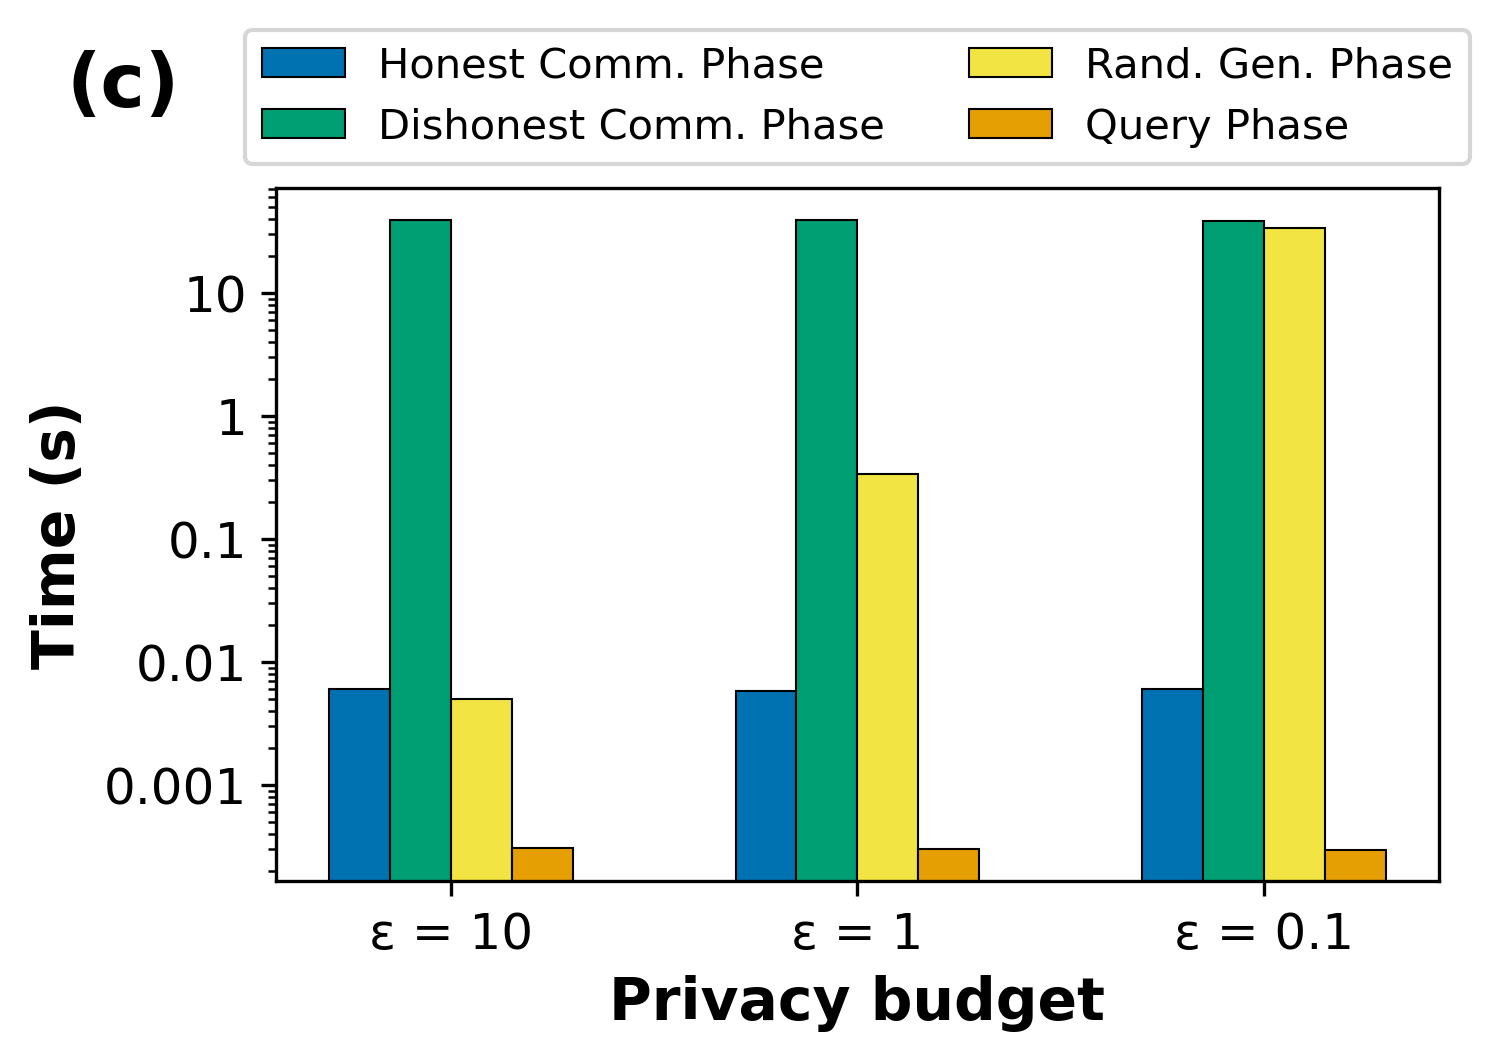

In [47]:
def epsilon_format_func(value, tick_number):
    return f'{value:.0f}' if value >= 1 else f'{value:.1f}' if value >= 0.1 else f'{value:.2f}' if value >= 0.01 else f'{value:.3f}'

epsilon_fig, epsilon_ax = plt.subplots(dpi=300, figsize=(5, 3))
bar_width = 0.15
line_width = 0.5

r1 = np.arange(len(epsilon_categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

epsilon_ax.bar(r1, epsilon_groups["Honest Comm Phase (s)"], color=COLORS['blue'], width=bar_width, linewidth=line_width, edgecolor='black', label='Honest Comm. Phase')
epsilon_ax.bar(r2, epsilon_groups["Dishonest Comm Phase (s)"], color=COLORS['green'], width=bar_width, linewidth=line_width, edgecolor='black', label='Dishonest Comm. Phase')
epsilon_ax.bar(r3, epsilon_groups["Rand Gen Phase (s)"], color=COLORS['yellow'], width=bar_width, linewidth=line_width, edgecolor='black', label='Rand. Gen. Phase')
epsilon_ax.bar(r4, epsilon_groups["Query Phase (s)"], color=COLORS['orange'], width=bar_width, linewidth=line_width, edgecolor='black', label='Query Phase')

plt.xlabel('Privacy budget', fontweight='bold', fontsize=axis_font_size)
plt.xticks([r + bar_width*1.5 for r in range(len(epsilon_categories))], epsilon_categories, fontsize=tick_font_size)
plt.ylabel('Time (s)', fontweight='bold', fontsize=axis_font_size)

epsilon_ax.set_yscale('log')
epsilon_ax.yaxis.set_major_formatter(FuncFormatter(epsilon_format_func))

plt.text(-0.18, 1.2, '(c)', horizontalalignment='left', verticalalignment='top', transform=epsilon_ax.transAxes, fontweight='bold', fontsize=corner_font_size)
plt.yticks(fontsize=tick_font_size)

plt.legend(ncol=2, bbox_to_anchor=(0.5, 1.005), loc='lower center', fontsize=legend_font_size)
plt.savefig('epsilon.png', dpi=300, bbox_inches='tight')
plt.show()


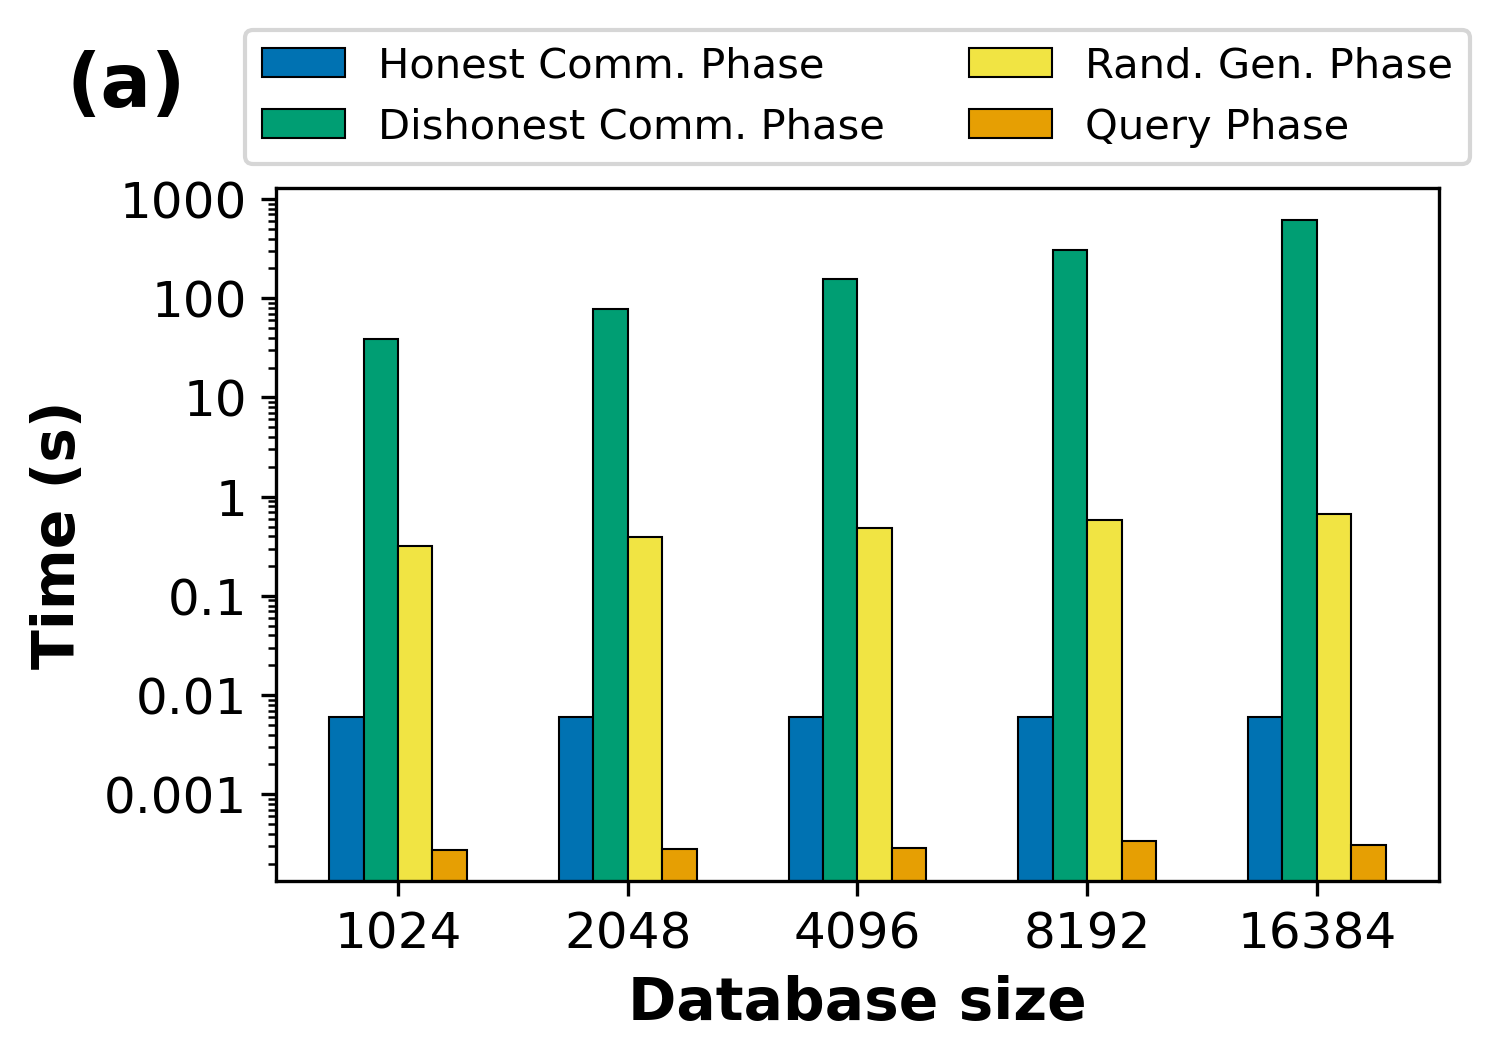

In [48]:
def db_size_format_func(value, tick_number):
    return f'{value:.0f}' if value >= 1 else f'{value:.1f}' if value >= 0.1 else f'{value:.2f}' if value >= 0.01 else f'{value:.3f}'

db_size_fig, db_size_ax = plt.subplots(dpi=300, figsize=(5, 3))
bar_width = 0.15
line_width = 0.5

r1 = np.arange(len(db_size_categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

db_size_ax.bar(r1, db_size_groups["Honest Comm Phase (s)"], color=COLORS['blue'], width=bar_width, linewidth=line_width, edgecolor='black', label='Honest Comm. Phase')
db_size_ax.bar(r2, db_size_groups["Dishonest Comm Phase (s)"], color=COLORS['green'], width=bar_width, linewidth=line_width, edgecolor='black', label='Dishonest Comm. Phase')
db_size_ax.bar(r3, db_size_groups["Rand Gen Phase (s)"], color=COLORS['yellow'], width=bar_width, linewidth=line_width, edgecolor='black', label='Rand. Gen. Phase')
db_size_ax.bar(r4, db_size_groups["Query Phase (s)"], color=COLORS['orange'], width=bar_width, linewidth=line_width, edgecolor='black', label='Query Phase')

plt.xlabel('Database size', fontweight='bold', fontsize=axis_font_size)
plt.xticks([r + bar_width*1.5 for r in range(len(db_size_categories))], db_size_categories, fontsize=tick_font_size)
plt.ylabel('Time (s)', fontweight='bold', fontsize=axis_font_size)

db_size_ax.set_yscale('log')
db_size_ax.yaxis.set_major_formatter(FuncFormatter(db_size_format_func))

plt.text(-0.18, 1.2, '(a)', horizontalalignment='left', verticalalignment='top', transform=db_size_ax.transAxes, fontweight='bold', fontsize=corner_font_size)
plt.yticks(fontsize=tick_font_size)

plt.legend(ncol=2, bbox_to_anchor=(0.5, 1.005), loc='lower center', fontsize=legend_font_size)
plt.savefig('db_size.png', dpi=300, bbox_inches='tight')
plt.show()

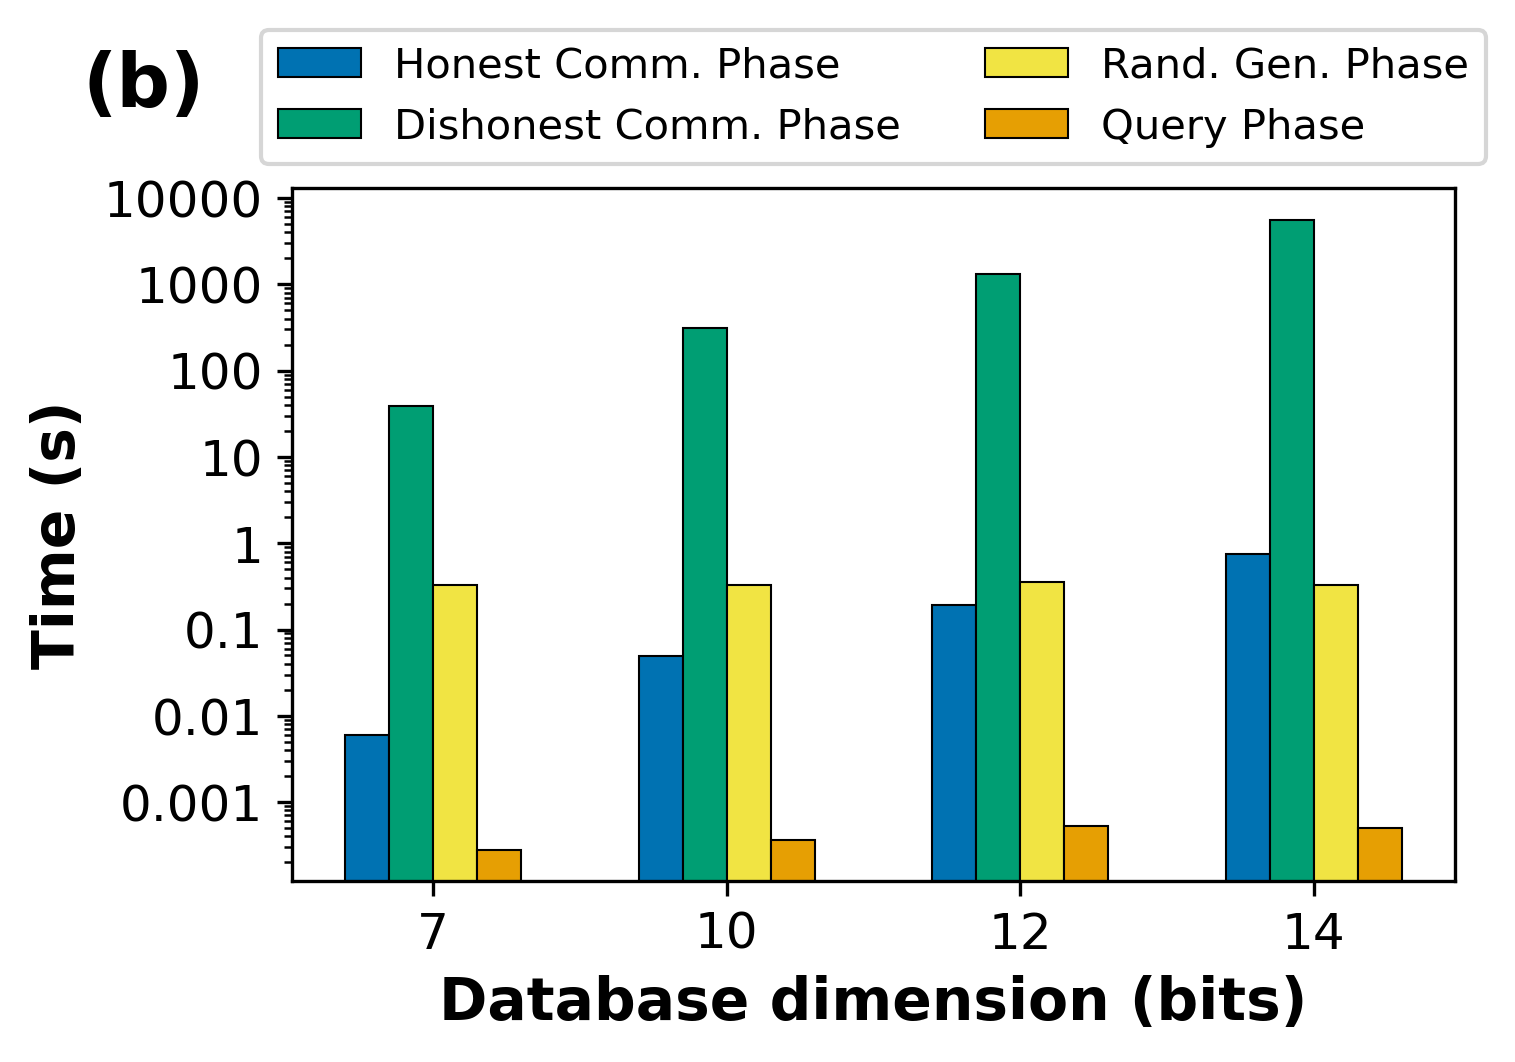

In [49]:
def db_dim_format_func(value, tick_number):
    return f'{value:.0f}' if value >= 1 else f'{value:.1f}' if value >= 0.1 else f'{value:.2f}' if value >= 0.01 else f'{value:.3f}'

db_dim_fig, db_dim_ax = plt.subplots(dpi=300, figsize=(5, 3))
bar_width = 0.15
line_width = 0.5

r1 = np.arange(len(db_dim_categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

db_dim_ax.bar(r1, db_dim_groups["Honest Comm Phase (s)"], color=COLORS['blue'], width=bar_width, linewidth=line_width, edgecolor='black', label='Honest Comm. Phase')
db_dim_ax.bar(r2, db_dim_groups["Dishonest Comm Phase (s)"], color=COLORS['green'], width=bar_width, linewidth=line_width, edgecolor='black', label='Dishonest Comm. Phase')
db_dim_ax.bar(r3, db_dim_groups["Rand Gen Phase (s)"], color=COLORS['yellow'], width=bar_width, linewidth=line_width, edgecolor='black', label='Rand. Gen. Phase')
db_dim_ax.bar(r4, db_dim_groups["Query Phase (s)"], color=COLORS['orange'], width=bar_width, linewidth=line_width, edgecolor='black', label='Query Phase')

plt.xlabel('Database dimension (bits)', fontweight='bold', fontsize=axis_font_size)
plt.xticks([r + bar_width*1.5 for r in range(len(db_dim_categories))], db_dim_categories, fontsize=tick_font_size)
plt.ylabel('Time (s)', fontweight='bold', fontsize=axis_font_size)

db_dim_ax.set_yscale('log')
db_dim_ax.yaxis.set_major_formatter(FuncFormatter(db_dim_format_func))
plt.yticks(fontsize=tick_font_size)

plt.text(-0.18, 1.2, '(b)', horizontalalignment='left', verticalalignment='top', transform=db_dim_ax.transAxes, fontweight='bold', fontsize=corner_font_size)

plt.legend(ncol=2, bbox_to_anchor=(0.5, 1.005), loc='lower center', fontsize=legend_font_size)
plt.savefig('db_dim.png', dpi=300, bbox_inches='tight')
plt.show()

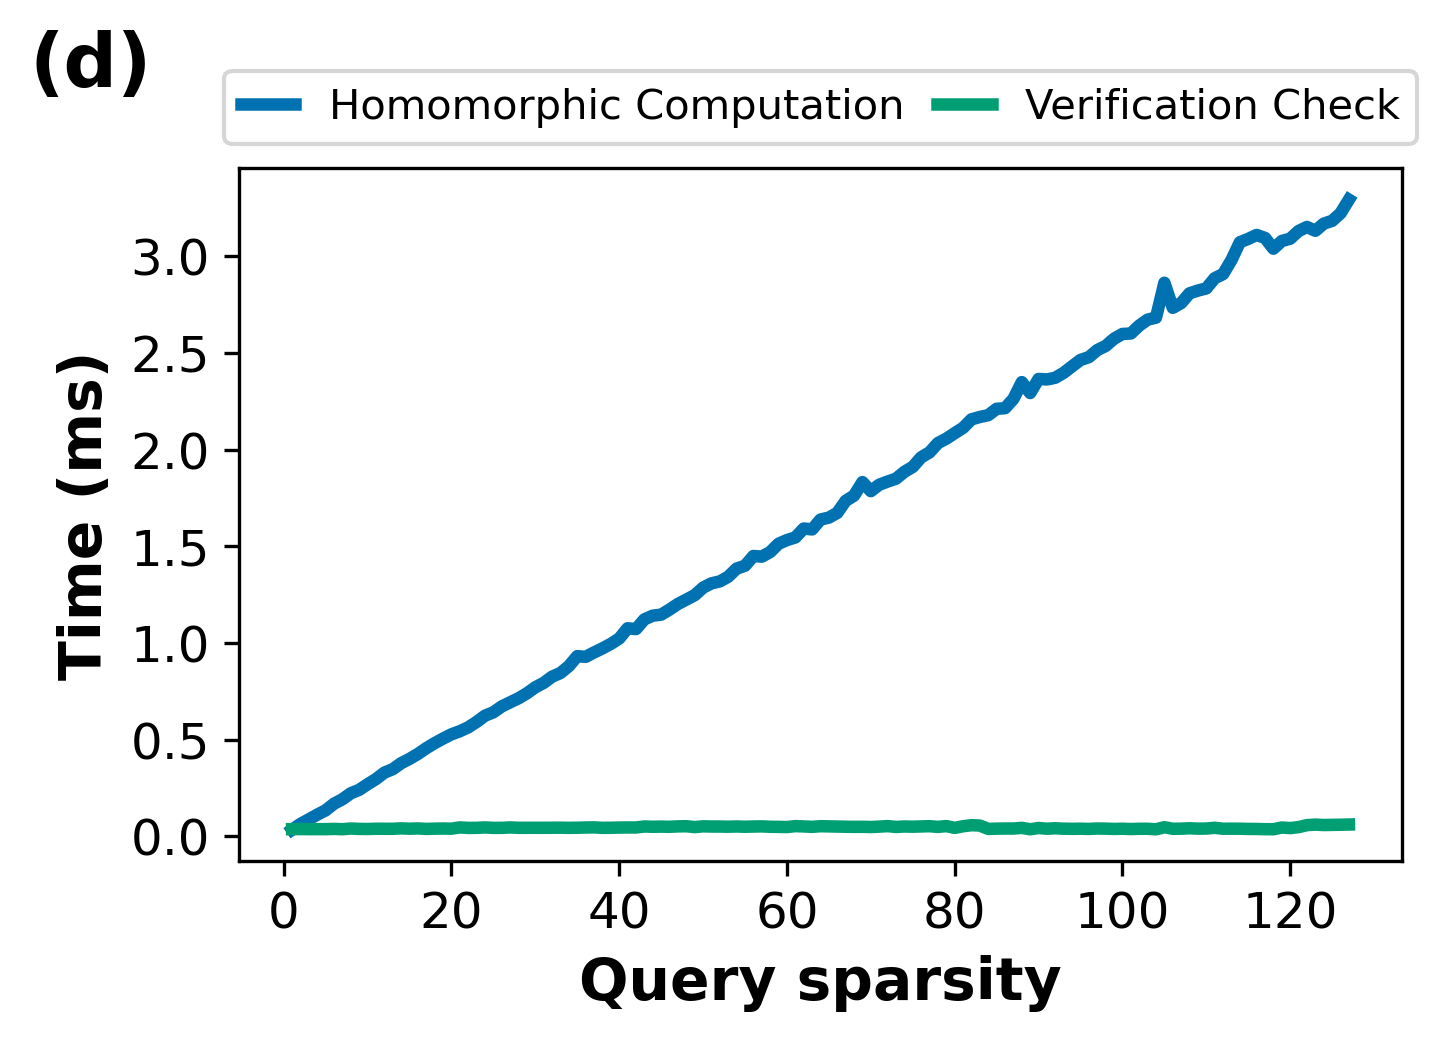

In [50]:
sparsity_line_fig, sparsity_line_ax = plt.subplots(dpi=300, figsize=(5, 3))
marker_size = 1
linewidth = 3

sparsity_line_ax.plot(sparsity_x, [y * 1000 for y in sparsity_homomorphic_s], linewidth=linewidth, color=COLORS['blue'], label='Homomorphic Computation', marker='.', markersize=marker_size)
sparsity_line_ax.plot(sparsity_x, [y * 1000 for y in sparsity_verify_s], linewidth=linewidth, color=COLORS['green'], label='Verification Check', marker='.', markersize=marker_size)

plt.xlabel('Query sparsity', fontweight='bold', fontsize=axis_font_size)
plt.ylabel('Time (ms)', fontweight='bold', fontsize=axis_font_size)
plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)

plt.text(-0.18, 1.2, '(d)', horizontalalignment='left', verticalalignment='top', transform=sparsity_line_ax.transAxes, fontweight='bold', fontsize=corner_font_size)

plt.legend(handlelength=1.3, columnspacing=0.8, ncol=2, bbox_to_anchor=(0.5, 1.005), loc='lower center', fontsize=legend_font_size)
plt.savefig('sparsity-line.png', dpi=300, bbox_inches='tight')
plt.show()